In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load preprocessed dataset
df = pd.read_csv("DV_AirFly_Preprocessed.csv")

print("✅ Dataset Loaded. Shape:", df.shape)
df.head()


✅ Dataset Loaded. Shape: (3000000, 36)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Month,DayOfWeek,Hour,Route
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065,0.0,0.0,0.0,0.0,0.0,1,2,11,FLL-EWR
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399,0.0,0.0,0.0,0.0,0.0,11,5,21,MSP-SEA
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680,0.0,0.0,0.0,0.0,0.0,7,4,9,DEN-MSP
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589,0.0,0.0,24.0,0.0,0.0,3,0,16,MSP-SFO
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,985,0.0,0.0,0.0,0.0,0.0,2,6,18,MCO-DFW


C:\Users\shiva\AppData\Local\Temp\ipykernel_25060\1406977635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.index, y=top_routes.values, palette="crest")


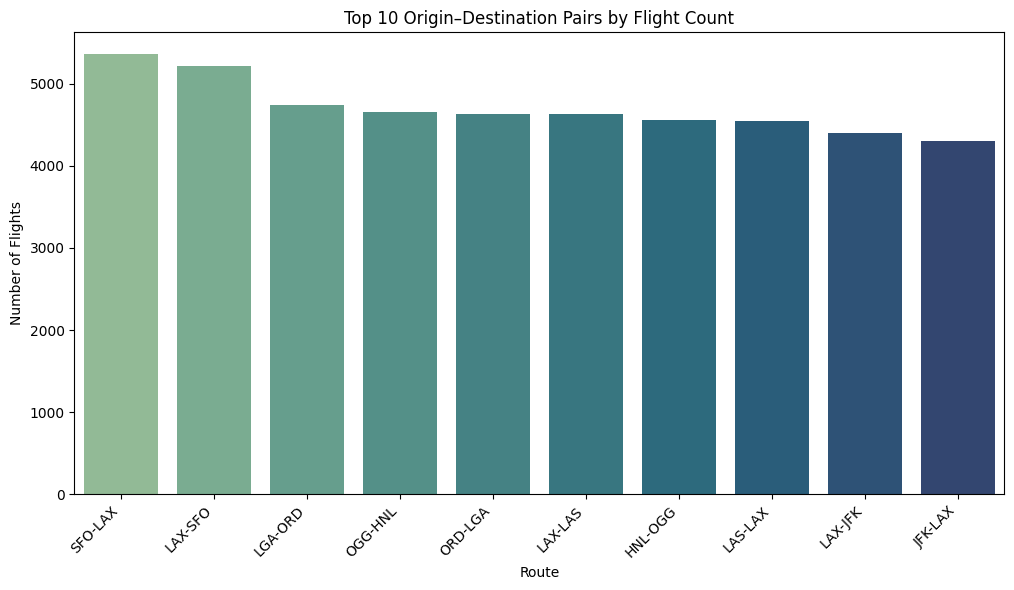

In [2]:
# %%
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.index, y=top_routes.values, palette="crest")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Origin–Destination Pairs by Flight Count")
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.show()


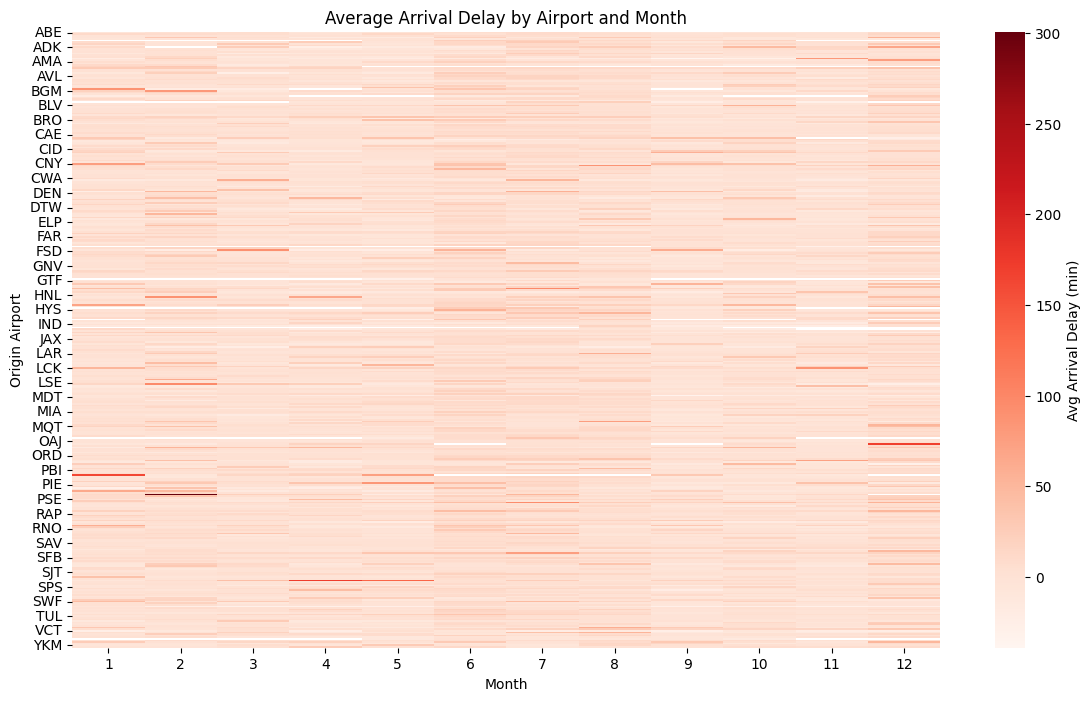

In [3]:
# %%
delay_heatmap = df.pivot_table(
    index="ORIGIN", columns="Month", values="ARR_DELAY", aggfunc="mean"
)

plt.figure(figsize=(14,8))
sns.heatmap(delay_heatmap, cmap="Reds", annot=False, cbar_kws={'label': 'Avg Arrival Delay (min)'})
plt.title("Average Arrival Delay by Airport and Month")
plt.xlabel("Month")
plt.ylabel("Origin Airport")
plt.show()


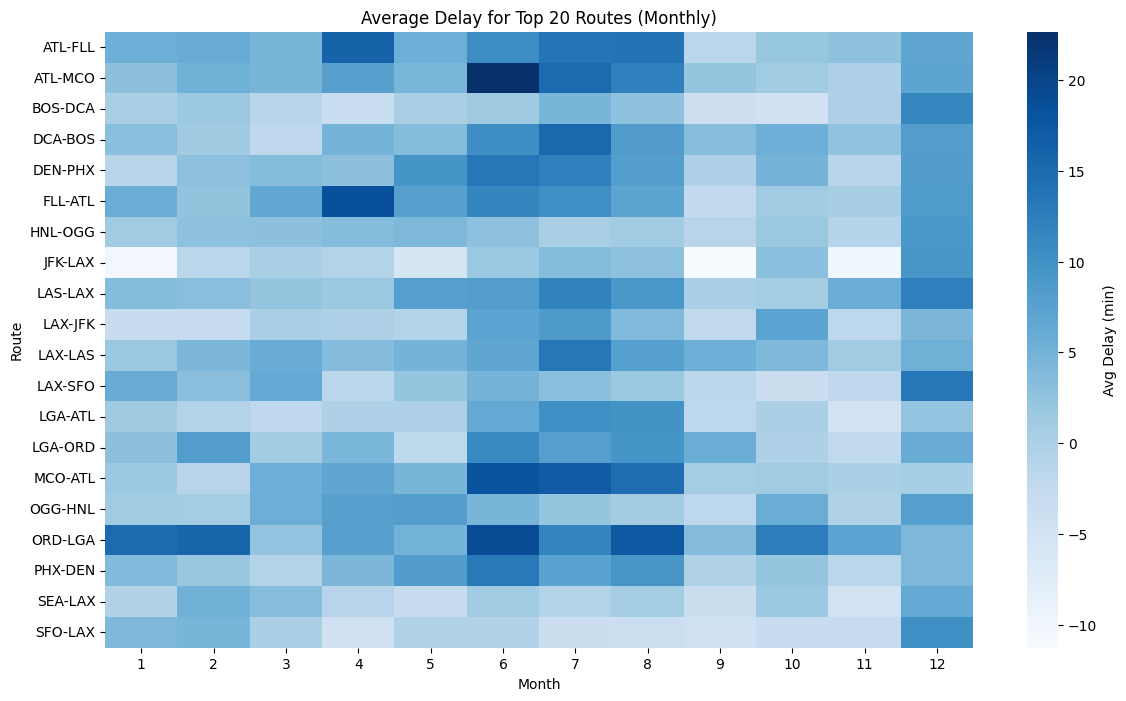

In [4]:
# %%
top20_routes = df['Route'].value_counts().head(20).index
delay_route_heatmap = df[df['Route'].isin(top20_routes)].pivot_table(
    index="Route", columns="Month", values="ARR_DELAY", aggfunc="mean"
)

plt.figure(figsize=(14,8))
sns.heatmap(delay_route_heatmap, cmap="Blues", annot=False, cbar_kws={'label': 'Avg Delay (min)'})
plt.title("Average Delay for Top 20 Routes (Monthly)")
plt.xlabel("Month")
plt.ylabel("Route")
plt.show()


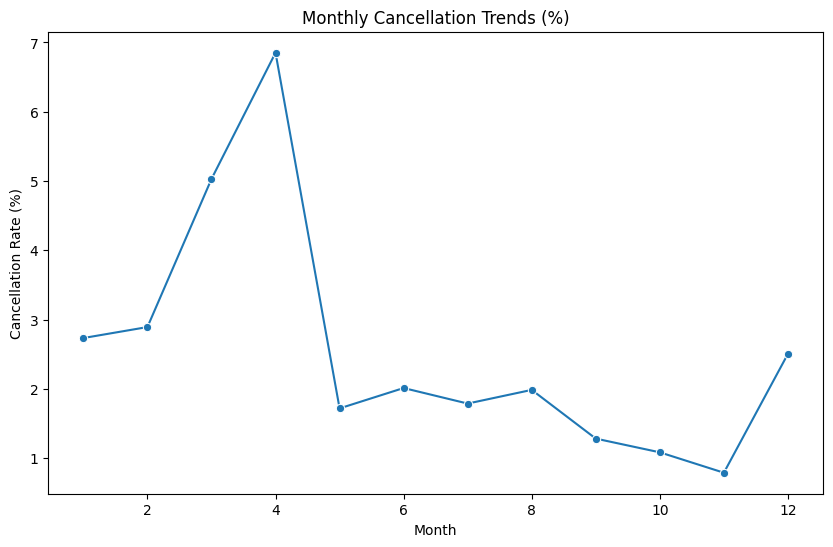

In [6]:
# %%
monthly_canc = df.groupby("Month")["CANCELLED"].mean() * 100

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_canc.index, y=monthly_canc.values, marker="o")
plt.title("Monthly Cancellation Trends (%)")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_25060\1416812820.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_counts.index, y=cancel_counts.values, palette="muted")


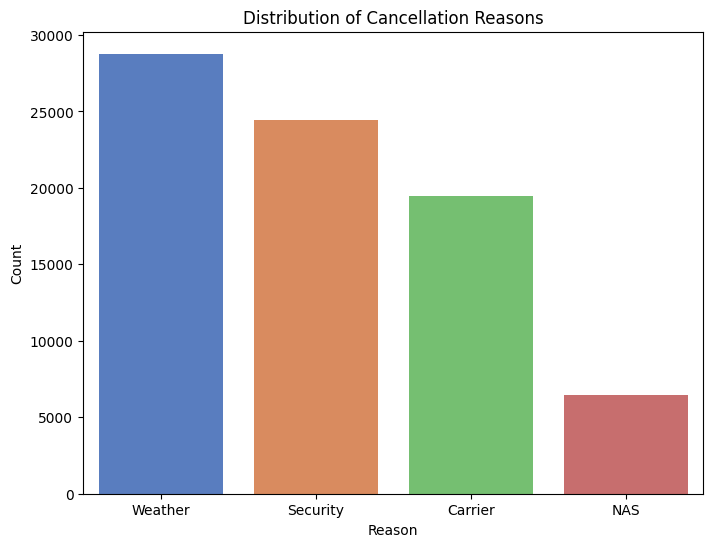

In [7]:
# %%
cancellation_map = {
    "A": "Carrier",
    "B": "Weather",
    "C": "NAS",
    "D": "Security"
}

df["CancellationReason"] = df["CANCELLATION_CODE"].map(cancellation_map)
cancel_counts = df["CancellationReason"].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=cancel_counts.index, y=cancel_counts.values, palette="muted")
plt.title("Distribution of Cancellation Reasons")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.show()


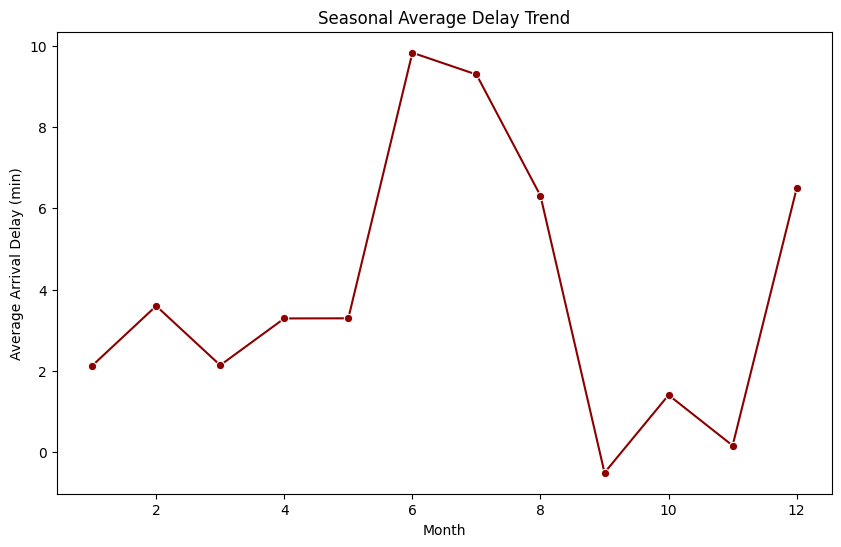

In [8]:
# %%
avg_delay_monthly = df.groupby("Month")["ARR_DELAY"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=avg_delay_monthly.index, y=avg_delay_monthly.values, marker="o", color="darkred")
plt.title("Seasonal Average Delay Trend")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay (min)")
plt.show()


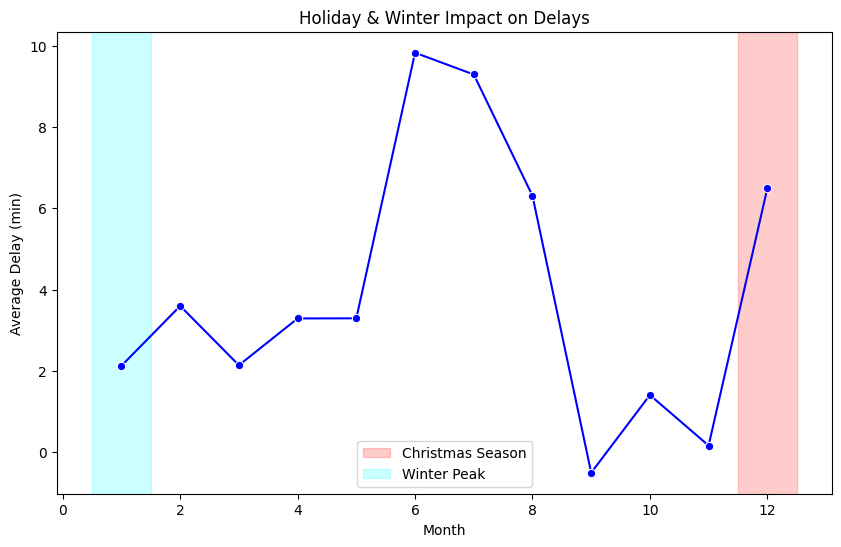

In [9]:
# %%
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_delay_monthly.index, y=avg_delay_monthly.values, marker="o", color="blue")

# Highlight December (12) & January (1)
plt.axvspan(12-0.5, 12+0.5, color="red", alpha=0.2, label="Christmas Season")
plt.axvspan(1-0.5, 1+0.5, color="cyan", alpha=0.2, label="Winter Peak")

plt.title("Holiday & Winter Impact on Delays")
plt.xlabel("Month")
plt.ylabel("Average Delay (min)")
plt.legend()
plt.show()
